In [30]:
import torch
import torchvision
import torchvision.transforms as transforms
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:
# a good guide: https://towardsdatascience.com/pytorch-layer-dimensions-what-sizes-should-they-be-and-why-4265a41e01fd

print(device)

cuda:0


In [ ]:
from torchvision.datasets import ImageFolder
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4
print("done")
trainset = torchvision.datasets.CIFAR10(root='./data', download=True, train=True, transform=transform)
print("done")
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', download=True, train=False, transform=transform)
print("done")
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)
print("done")

done
done
done
done


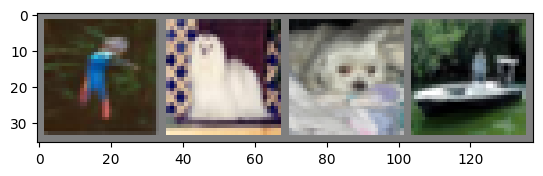

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
#print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

# Convolutional Neural Network architecture

In [33]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        # ADJUST SOME NUMBERS HERE
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5) # convolutional layer
        self.pool = nn.MaxPool2d(2, 2) # pooling
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5) # convolutional layer
        self.fc1 = nn.Linear(16 * 5 * 5, 120) # fully connected layer 1
        self.fc2 = nn.Linear(120, 84) # fully connected layer 2
        self.fc3 = nn.Linear(84, 10) # fully connected layer 3

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
net = net.to(device)

# Loss function and optimizer

In [34]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

# Main training loop

In [35]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.025
[1,  4000] loss: 1.776
[1,  6000] loss: 1.704
[1,  8000] loss: 1.650
[1, 10000] loss: 1.625
[1, 12000] loss: 1.621
[2,  2000] loss: 1.559
[2,  4000] loss: 1.580
[2,  6000] loss: 1.589
[2,  8000] loss: 1.620
[2, 10000] loss: 1.597
[2, 12000] loss: 1.594
Finished Training


In [36]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total} %')

Accuracy of the network on the 10000 test images: 43.03 %


# Write Your Observations Here

- After training, the accuracy of the network on the test images is ________%
- Adjust the learning rate to 0.005 and then run the training loop again. The accuracy of the network on the test images is ________%
- There are some numbers in the convolutional neural network architecture. Adjust these values to observe the change in accuracy.
- The highest accuracy you got in the test dataset is _________%